# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putri Ayu Manurung
- **Email:** putrimanurung2003@gmail.com
- **ID Dicoding:** putriayumanurung03

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke 2012?
- Bagaimana korelasi antara suhu lingkungan (temperature) dan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

Melakukan import library pandas, matplotlib dan seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca dataset day.csv dari folder data kemudian menampilkan data teratas dari dataset tersebut

In [2]:
bike_sharing_df = pd.read_csv("data/day.csv", delimiter=",")
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Melakukan checking apakah terdapat data null pada dataset tersebut

In [4]:
print("- Data Null : ")
print(bike_sharing_df.isnull().sum())

- Data Null : 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Melakukan checking apakah terjadi duplikasi pada data di setiap kolom dataset tersebut

In [8]:
print("- Data Duplicate : " + str(bike_sharing_df.duplicated().sum()))

- Data Duplicate : 0


Mengecek tipe data di setiap kolom dataset

In [9]:
print("- Tipe Data Tiap Kolom : ")
print(bike_sharing_df.info())

- Tipe Data Tiap Kolom : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Mendeskripsikan keseluruhan data dalam dataset

In [10]:
print(bike_sharing_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

### Cleaning Data

Mengubah tipe data dteday dari object ke datetime

In [11]:

datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_sharing_df[column] = pd.to_datetime(bike_sharing_df[column])

print(bike_sharing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa


Mengembalikan nilai temp, atemp, hum, windspeed ke nilai sebenarnya pada file readme.txt yang ada di folder dataset, dijelaskan bahwa kolom tersebut pada dataset sudah dibagi dengan 41 untuk temperature, 50 untuk atemp, 100 untuk humidity dan 67 untuk windspeed

In [12]:
bike_sharing_df["temp"] = bike_sharing_df["temp"] * 41
bike_sharing_df["atemp"] = bike_sharing_df["atemp"] * 50
bike_sharing_df["hum"] = bike_sharing_df["hum"] * 100
bike_sharing_df["windspeed"] = bike_sharing_df["windspeed"] * 67

print(bike_sharing_df.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349   20.310776   23.717699   
min      0.000000    0.000000    0.000000    1.000000 

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset

In [13]:
bike_sharing_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Mengeksplorasi data jumlah peminjaman untuk setiap bulan nya di tahun 2011 dan 2012

In [35]:
# Mengambil tahun dan bulan dari kolom 'dteday'
bike_sharing_df['year'] = bike_sharing_df['dteday'].dt.year
bike_sharing_df['month'] = bike_sharing_df['dteday'].dt.month

# Mengelompokkan data berdasarkan tahun dan bulan, kemudian menjumlahkan jumlah peminjaman
monthly_rentals = bike_sharing_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

# Menambahkan kolom 'month_name' untuk nama bulan
monthly_rentals['month_name'] = pd.to_datetime(monthly_rentals['month'], format='%m').dt.month_name()

# EDA
eda_result = monthly_rentals.groupby(by=["year", "month_name"]).agg({
    "cnt": "sum"
})
print(eda_result)

                    cnt
year month_name        
2011 April        94870
     August      136691
     December     87323
     February     48215
     January      38189
     July        141341
     June        143512
     March        64045
     May         135821
     November    102167
     October     123511
     September   127418
2012 April       174224
     August      214503
     December    123713
     February    103137
     January      96744
     July        203607
     June        202830
     March       164875
     May         195865
     November    152664
     October     198841
     September   218573


Mengelompokan data tahunan

In [42]:
data_tahunan = bike_sharing_df.groupby('yr').sum(numeric_only=True)
print(data_tahunan)

# Menghitung korelasi antara suhu lingkungan dan jumlah peminjaman sepeda
correlation = bike_sharing_df['temp'].corr(bike_sharing_df['cnt'])

print(f"Korelasi antara suhu lingkungan dan jumlah peminjaman sepeda: {correlation}")

    instant  season  mnth  holiday  weekday  workingday  weathersit  \
yr                                                                    
0     66795     912  2382       10     1098         250         519   
1    200751     913  2384       11     1093         250         501   

           temp        atemp        hum    windspeed  casual  registered  \
yr                                                                         
0   7282.940962  8519.744935  23493.764  4680.751434  247252      995851   
1   7564.236534  8817.893350  22405.292  4648.691753  372765     1676811   

        cnt    year  month  
yr                          
0   1243103  734015   2382  
1   2049576  736392   2384  
Korelasi antara suhu lingkungan dan jumlah peminjaman sepeda: 0.6274940090334925


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke 2012?

Total Peminjaman Sepeda Tahun 2011: 1243103
Total Peminjaman Sepeda Tahun 2012: 2049576
Jumlah Peningkatan Peminjaman Sepeda: 806473
Persentase Peningkatan Peminjaman Sepeda: 64.87579870694545 %


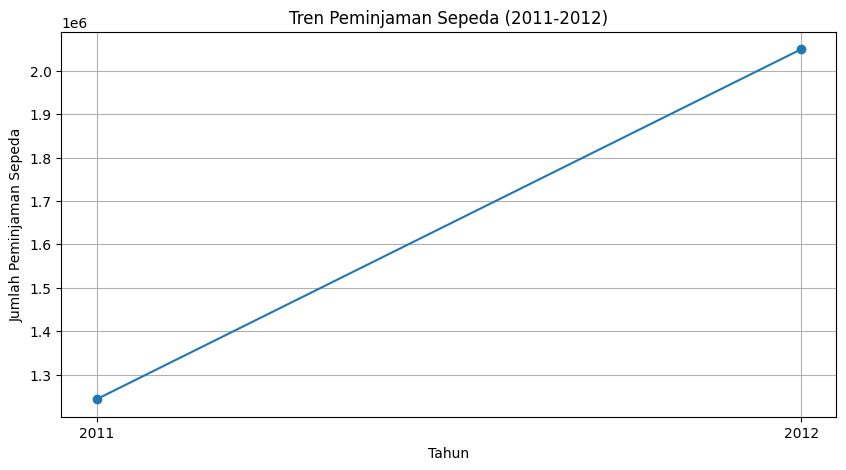

In [43]:
# Menghitung total peminjaman sepeda sepanjang tahun 2011 dan 2012
total_rentals_2011 = bike_sharing_df[bike_sharing_df['year'] == 2011]['cnt'].sum()
total_rentals_2012 = bike_sharing_df[bike_sharing_df['year'] == 2012]['cnt'].sum()

print("Total Peminjaman Sepeda Tahun 2011:", total_rentals_2011)
print("Total Peminjaman Sepeda Tahun 2012:", total_rentals_2012)

# Menghitung jumlah peningkatan
peningkatan = total_rentals_2012 - total_rentals_2011
print("Jumlah Peningkatan Peminjaman Sepeda:", peningkatan)

# Menghitung persentase peningkatan
persentase_peningkatan = (peningkatan / total_rentals_2011) * 100
print("Persentase Peningkatan Peminjaman Sepeda:", persentase_peningkatan, "%")

# Visualisasi tren peminjaman sepeda dari tahun 2011 ke 2012
plt.figure(figsize=(10, 5))
plt.plot(data_tahunan.index, data_tahunan['cnt'], marker='o')
plt.title('Tren Peminjaman Sepeda (2011-2012)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks([0, 1], ['2011', '2012'])
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana korelasi antara suhu lingkungan (temperature) dan jumlah peminjaman sepeda?

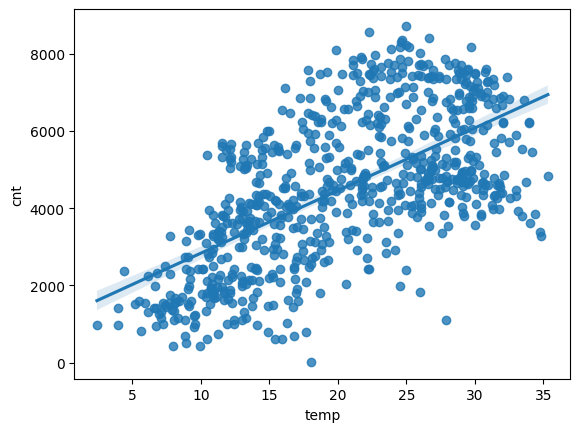

Korelasi antara Suhu Lingkungan dan Jumlah Peminjaman Sepeda: 0.6274940090334925


In [44]:
sns.regplot(x=bike_sharing_df["temp"], y=bike_sharing_df["cnt"])
plt.show()

print("Korelasi antara Suhu Lingkungan dan Jumlah Peminjaman Sepeda:", correlation)

## Conclusion

1. Bagaimana tren peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke 2012?
  - Melalui analisis EDA yang didapat, Tren jumlah peminjaman sepeda dari tahun 2011 ke 2012 mengalami peningkatan sebanyak 806473 dengan persentase peningkatan sebesar  64.875%

2. Bagaimana korelasi antara suhu lingkungan (temperature) dan jumlah peminjaman sepeda?
  - Dari analisis yang didapat, diperoleh korelasi antara suhu lingkungan dengan peminjaman sepeda sebesar 0.6274 yang menunjukan korelasi positif antara variabel suhu lingkungan dan jumlah peminjaman sepeda. Disimpulkan bahwa semakin hangat suhu lingkungan, maka semakin banyak peminjaman sepeda.